### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [77]:
tf.__version__

'1.13.1'

### Collect Data

In [0]:
import tensorflow.keras as keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [80]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)

In [82]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt

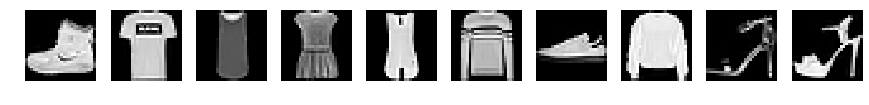

label for each of the above image:
 [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [17]:
fig=plt.figure(figsize=(15, 15))
col = 10
row = 1
labels = []
for i in range(0, col*row):
    fig.add_subplot(row, col, i+1)
    plt.axis('off')
    plt.imshow(trainX[i],cmap='gray')
    labels.append(trainY[i].tolist().index(1))
plt.show()
print("label for each of the above image:\n", labels)

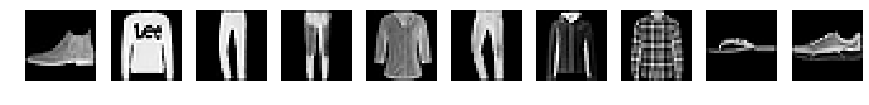

label for each of the above image:
 [9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [83]:
fig=plt.figure(figsize=(15, 15))
col = 10
row = 1
labels = []
for i in range(0, col*row):
    fig.add_subplot(row, col, i+1)
    plt.axis('off')
    plt.imshow(testX[i],cmap='gray')
    labels.append(testY[i].tolist().index(1))
plt.show()
print("label for each of the above image:\n", labels)

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [34]:
model.fit(trainX, trainY, batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 1.6574 - acc: 0.5884
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 1.0328 - acc: 0.7147
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.8016 - acc: 0.7649
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.6875 - acc: 0.7871
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.6253 - acc: 0.7998
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5884 - acc: 0.8055
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5680 - acc: 0.8116
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5448 - acc: 0.8155
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5385 - acc: 0.8166
Epoch 10/10
60000/60000 [==============================] - 3s 44us/sample - loss: 

Checking dropouts

In [0]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(trainX, trainY, batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 1.7755 - acc: 0.5245
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 1.1219 - acc: 0.6958
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.8674 - acc: 0.7366
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.7470 - acc: 0.7617
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.6819 - acc: 0.7752
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6487 - acc: 0.7800
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6205 - acc: 0.7846
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6055 - acc: 0.7900
Epoch 9/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5960 - acc: 0.7942
Epoch 10/10
60000/60000 [==============================] - 3s 48us/sample - loss: 

Dropouts didn't perform well

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(trainX, trainY, batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 1.8175 - acc: 0.5767
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 1.1987 - acc: 0.7009
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.9145 - acc: 0.7328
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.7732 - acc: 0.7494
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.6944 - acc: 0.7628
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.6419 - acc: 0.7750
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.6058 - acc: 0.7867
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5754 - acc: 0.7965
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5518 - acc: 0.8055
Epoch 10/10
60000/60000 [==============================] - 4s 64us/sample - loss: 

Batch Normalization works much better than non-regularized network

### Execute the model

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(trainX,trainY,batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 2.2744 - acc: 0.2030
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 2.1597 - acc: 0.4680
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.0675 - acc: 0.5649
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 1.9786 - acc: 0.5969
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 1.8912 - acc: 0.6088
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.8054 - acc: 0.6216
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.7214 - acc: 0.6293
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 1.6400 - acc: 0.6313
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 1.5632 - acc: 0.6424
Epoch 10/10
60000/60000 [==============================] - 4s 65us/sample - loss: 

A very low learning rate shows that the model hasn't been able to reach the global minima and hence the poor accuracy after 10 epochs

In [0]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(trainX,trainY,batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 1.8645 - acc: 0.5316
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.2337 - acc: 0.6917
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9424 - acc: 0.7297
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.7956 - acc: 0.7452
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.7107 - acc: 0.7581
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.6570 - acc: 0.7688
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.6181 - acc: 0.7819
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5866 - acc: 0.7929
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5623 - acc: 0.8012
Epoch 10/10
60000/60000 [==============================] - 4s 65us/sample - loss: 

Accuracy improved significantly by increasing learning rate. 

In [0]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.fit(trainX,trainY,batch_size=64,epochs=15)

Epoch 1/15
60000/60000 [==============================] - 4s 70us/sample - loss: 1.8543 - acc: 0.5512
Epoch 2/15
60000/60000 [==============================] - 4s 66us/sample - loss: 1.2305 - acc: 0.6991
Epoch 3/15
60000/60000 [==============================] - 4s 65us/sample - loss: 0.9285 - acc: 0.7284
Epoch 4/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.7818 - acc: 0.7459
Epoch 5/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.7009 - acc: 0.7602
Epoch 6/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6494 - acc: 0.7727
Epoch 7/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.6124 - acc: 0.7843
Epoch 8/15
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5826 - acc: 0.7953
Epoch 9/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5586 - acc: 0.8031
Epoch 10/15
60000/60000 [==============================] - 4s 66us/sample - loss: 

Not much improvement on LR = 0.1 when the epoch was 10. However, acuracy improved with epoch = 15





### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.SGD(lr=0.03), loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.fit(trainX, trainY, batch_size=64,epochs=15)

Epoch 1/15
60000/60000 [==============================] - 4s 71us/sample - loss: 1.3217 - acc: 0.6505
Epoch 2/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.7085 - acc: 0.7613
Epoch 3/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5798 - acc: 0.7971
Epoch 4/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5190 - acc: 0.8175
Epoch 5/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4863 - acc: 0.8281
Epoch 6/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4621 - acc: 0.8368
Epoch 7/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4456 - acc: 0.8418
Epoch 8/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4282 - acc: 0.8481
Epoch 9/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4166 - acc: 0.8522
Epoch 10/15
60000/60000 [==============================] - 4s 67us/sample - loss: 

Don't see significant increase in accuracy from epoch 10 to 15. 

## Review model

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_23 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_7 (Ba (None, 784)               3136      
_________________________________________________________________
dense_69 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_70 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_71 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [67]:
score = model.evaluate(trainX, trainY, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.87621665


### Run the model

In [0]:
 y_predict = model.predict(testX)

In [69]:
y_predict[0]

array([1.7031359e-04, 5.3359382e-04, 6.0939428e-04, 1.1697564e-03,
       4.1722076e-04, 1.2002794e-01, 4.4108625e-04, 1.7764100e-01,
       6.2831272e-03, 6.9270658e-01], dtype=float32)

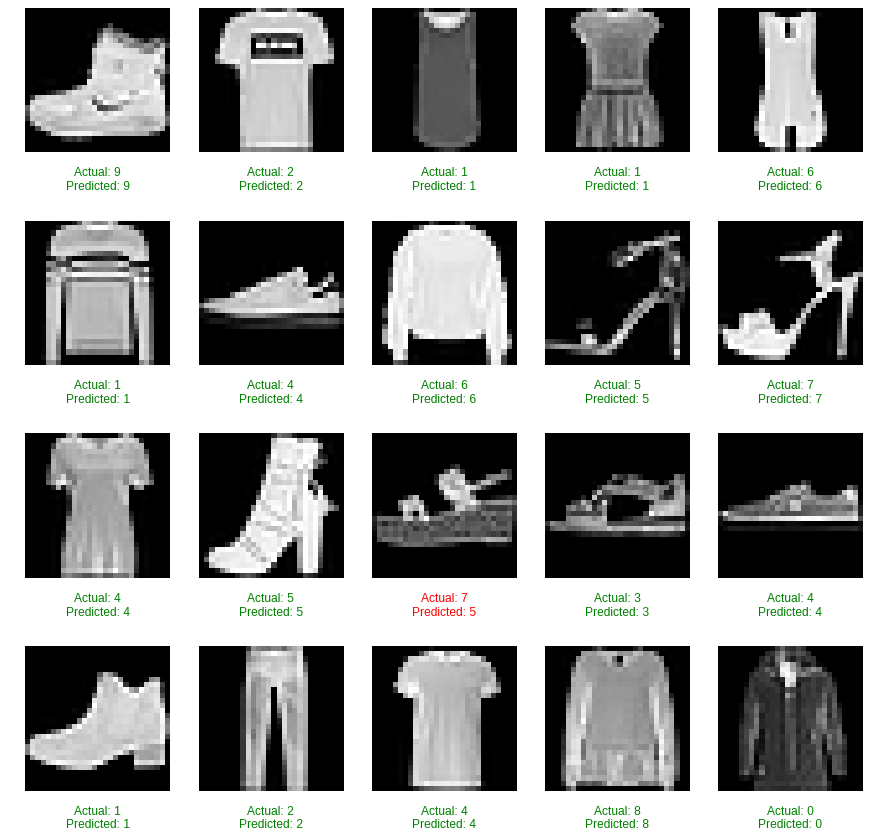

In [85]:
fig=plt.figure(figsize=(15, 15))
col = 5
row = 4
plabels=[]
for i in range(0, col*row):
    fig.add_subplot(row, col, i+1)
    plt.axis('off')
    plt.imshow(trainX[i],cmap='gray')
    actual = testY[i].tolist().index(1)
    predicted = y_predict[i].argmax()
    plt.title("Actual: "+ str(actual) + "\nPredicted: "+ str(predicted), 
              y=-0.3, color='green' if actual == predicted else 'red')
    labels.append(testY[i].tolist().index(1))
    plabels.append(y_predict[i].argmax())
plt.show()